<a href="https://colab.research.google.com/github/KueKarambiaaa/Amhy/blob/main/notebook_bikesharingdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Proyek Analisis Data** **- Bike Sharing Dataset**

In [48]:
#Proyek Analisis Data: [Bike Sharing Dataset (Sumber)]
#Nama: [Rahmi Amilia A]
#Email: [amhyliarahmi@gmail.com]
#ID Dicoding: [cakekarambiaa]

In [49]:
# Import required dependencies
import pandas as pd
pd.options.display.max_columns=99
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

In [50]:
# Load dataset
bike_dataset = pd.read_csv('/content/day.csv')

In [51]:
# Load dataset
bike_dataset = pd.read_csv('/content/hour.csv')

In [52]:
# Show dataset shape
bike_dataset.shape
# Show the first five samples in the dataset
bike_dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [53]:
# Show some statistical info about the dataset
bike_dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [54]:
# Check if there is any none(missing) values in the dataset to decide if will make a data cleaning or not
bike_dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [55]:
# Rename some columns
print(bike_dataset.columns)
bike_dataset = bike_dataset.rename(columns={'yr':'year',
                                            'mnth':'month',
                                            'hum':'humidity',
                                            'weathersit':'weather',
                                            'cnt':'count',
                                           'hr':'hour'})
# Show dataset columns after rename some columns
print(bike_dataset.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Index(['instant', 'dteday', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [56]:
# Show unique values for each column
for col in bike_dataset.columns:
    print(f"the columns {col} has: ",end='')
    print(len(bike_dataset[col].unique()),'unique values\n')

the columns instant has: 17379 unique values

the columns dteday has: 731 unique values

the columns season has: 4 unique values

the columns year has: 2 unique values

the columns month has: 12 unique values

the columns hour has: 24 unique values

the columns holiday has: 2 unique values

the columns weekday has: 7 unique values

the columns workingday has: 2 unique values

the columns weather has: 4 unique values

the columns temp has: 50 unique values

the columns atemp has: 65 unique values

the columns humidity has: 89 unique values

the columns windspeed has: 30 unique values

the columns casual has: 322 unique values

the columns registered has: 776 unique values

the columns count has: 869 unique values



In [57]:
print(len(bike_dataset.columns))

17


the column season has:  season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64
the column year has:  year
1    8734
0    8645
Name: count, dtype: int64
the column month has:  month
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64
the column hour has:  hour
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64
the column holiday has:  holiday
0    16879
1      500
Name: count, dtype: int64
the column weekday has:  weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64
the column workingday has:  workingday
1    11865
0     5514
Name: count, dtype: int64
the column weather has:  weather
1    11413
2     454

<Figure size 500x500 with 0 Axes>

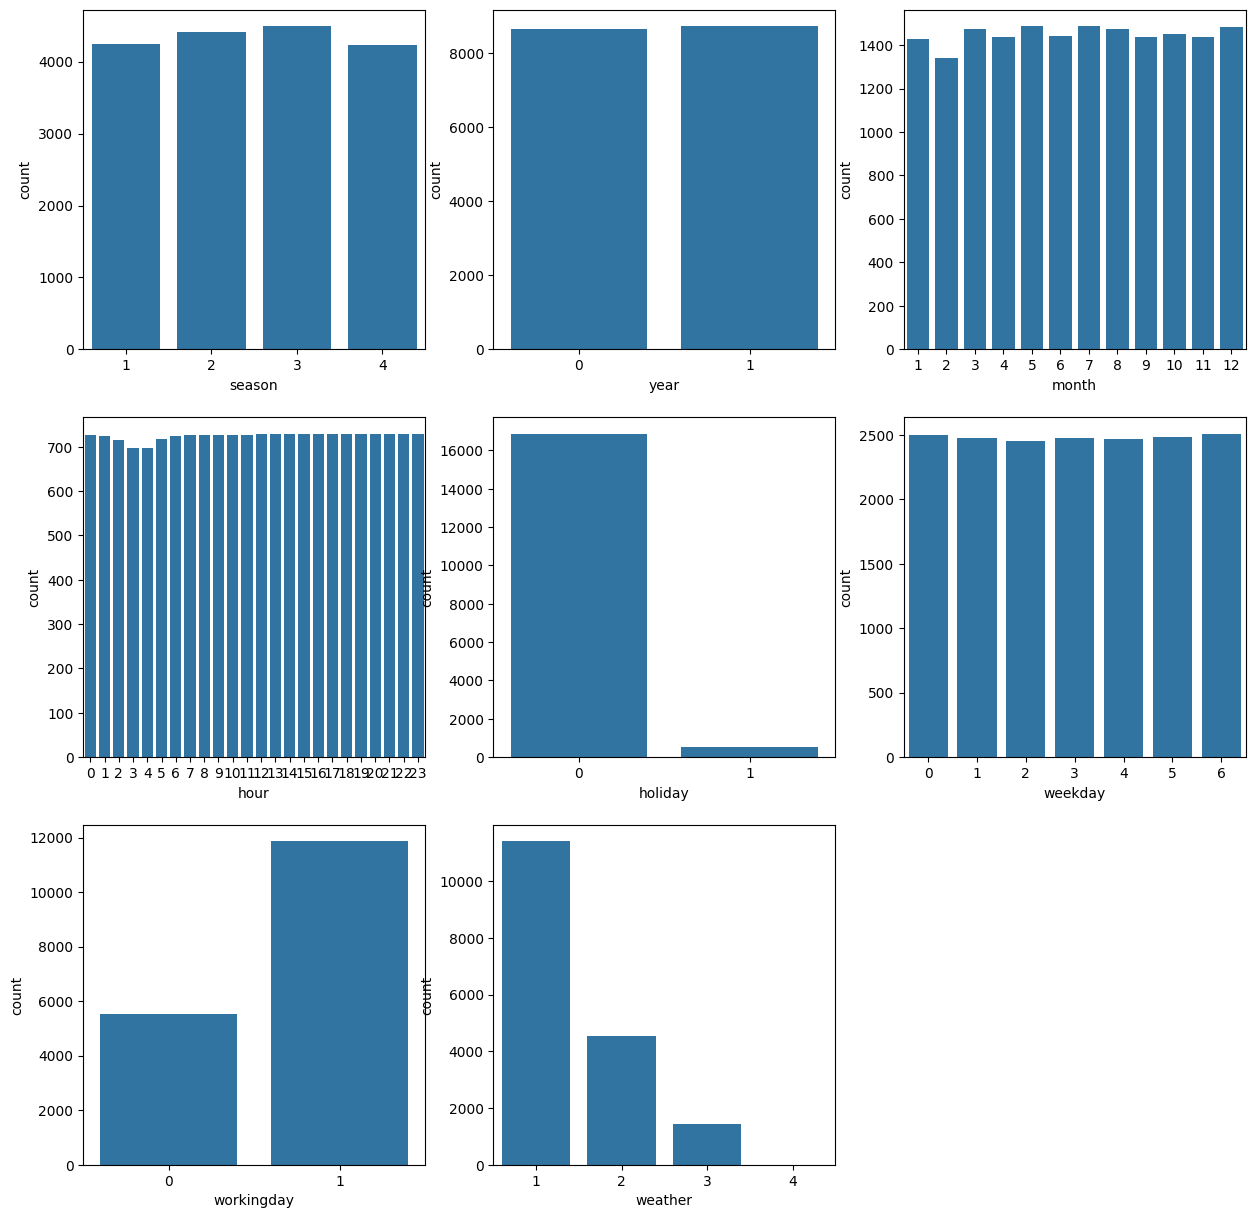

In [58]:
# Count values for each columns that has counted values and plot this count
plt.figure(figsize=(5,5))
counter=1
plt.figure(figsize=(15,15))
for col in bike_dataset.columns:
    if col not in ['instant','dteday','count','registered','casual','windspeed','humidity','atemp','temp']:
        print(f"the column {col} has: ",bike_dataset[col].value_counts())
        plt.subplot(3,3,counter)
        sns.countplot(x=col,data=bike_dataset)
        counter+=1
plt.show()

the disttribution of column count is: 


<ipython-input-59-0e58aee70914>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bike_dataset[col],color=color_dist)


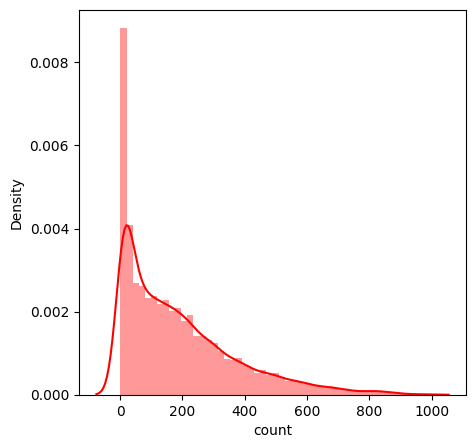

the disttribution of column temp is: 


<ipython-input-59-0e58aee70914>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bike_dataset[col],color=color_dist)


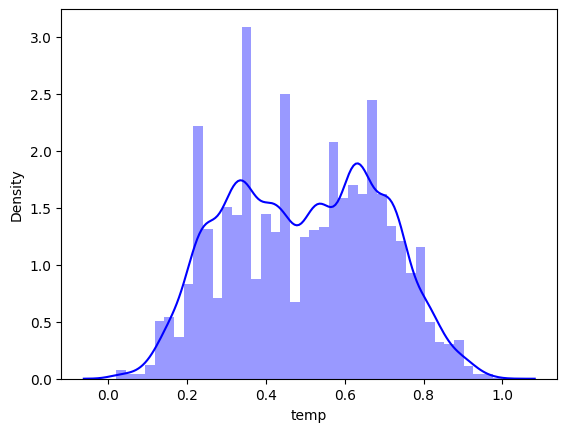

In [59]:
# Visualize distribtuion for each columns that has a lot of values
plt.figure(figsize=(5,5))
for col,color_dist in zip(['count','temp'],['red','blue']):
    print(f"the disttribution of column {col} is: ")
    sns.distplot(bike_dataset[col],color=color_dist)
    plt.show()

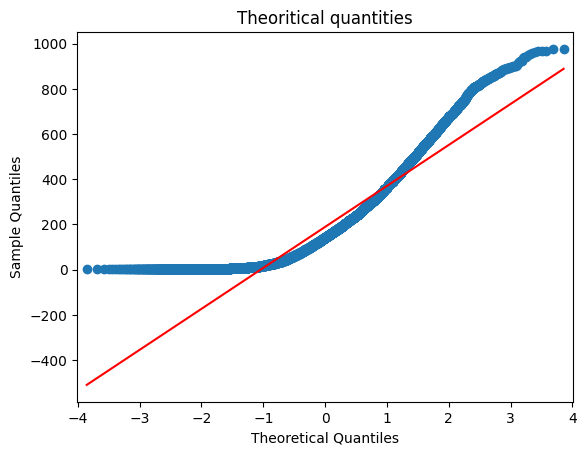

<ipython-input-60-35804eebb75f>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bike_dataset['count'],color='red')


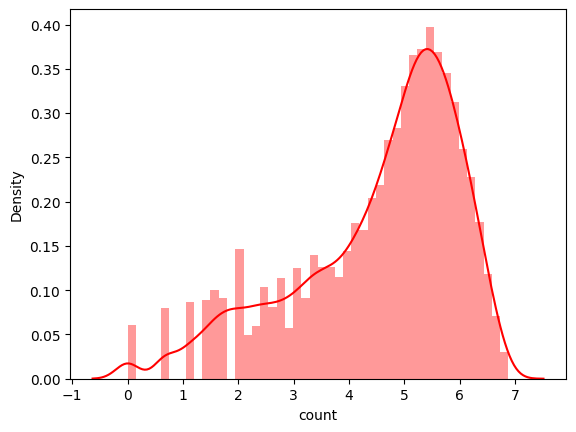

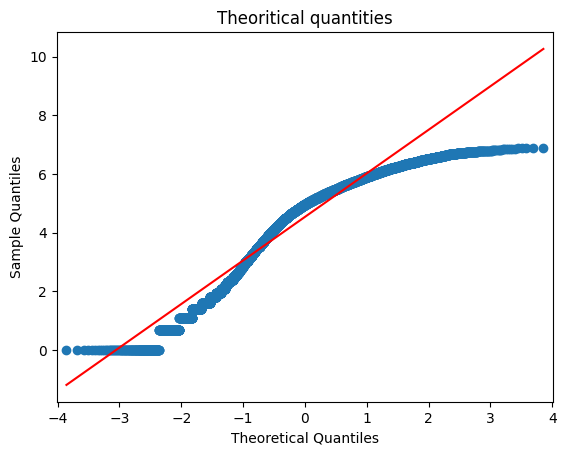

In [60]:
from statsmodels.graphics.gofplots import qqplot
qqplot(bike_dataset['count'],line='s')
plt.title('Theoritical quantities')
plt.show()
# change the distribution of count column
bike_dataset['count'] = np.log(bike_dataset['count'])
# Plot the distribution after change it
sns.distplot(bike_dataset['count'],color='red')
plt.show()
qqplot(bike_dataset['count'],line='s')
plt.title('Theoritical quantities')
plt.show()

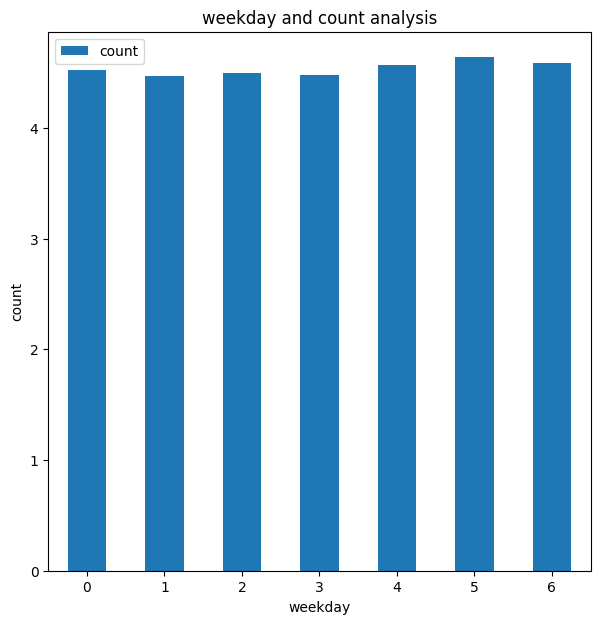

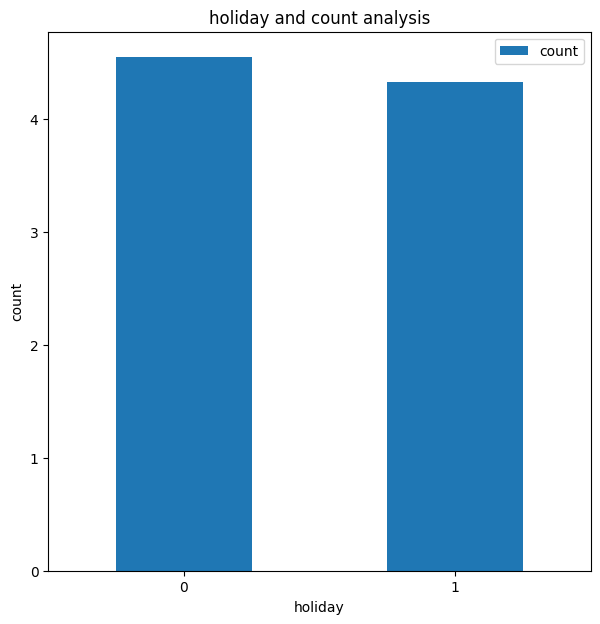

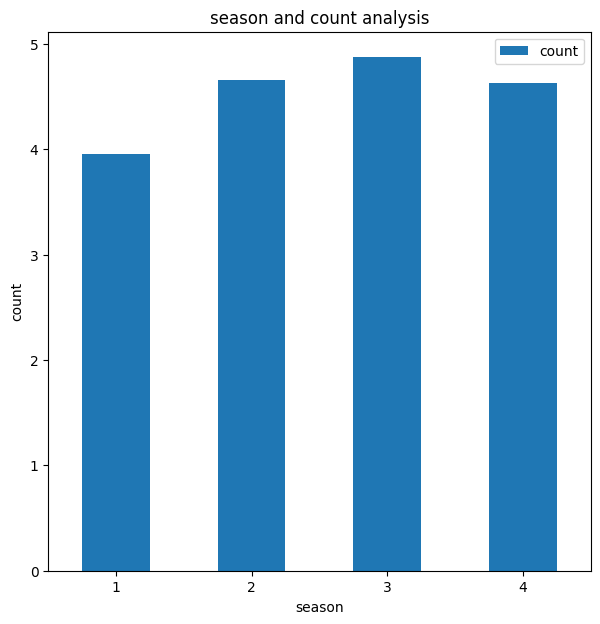

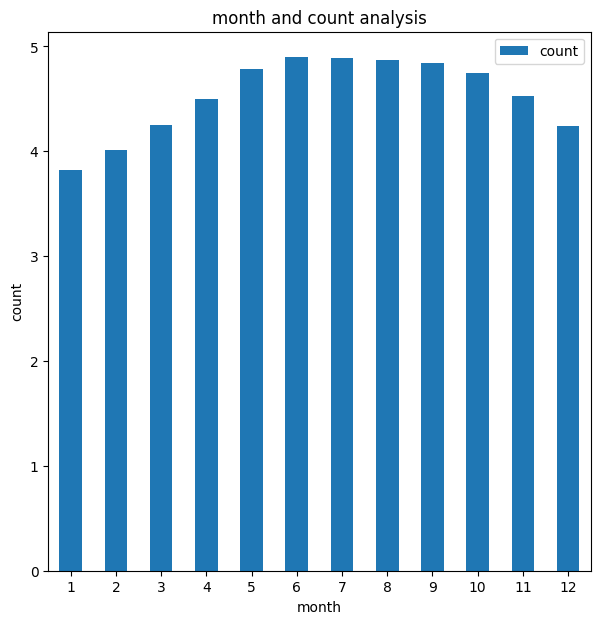

In [61]:
# group by index and make a aggfunc for values
# Bivariate analysis for weekday and count columns
weekday_relation = bike_dataset.pivot_table(index='weekday',values='count',aggfunc=np.mean)
weekday_relation.plot(kind='bar',figsize=(7,7))
plt.xlabel('weekday')
plt.ylabel('count')
plt.title('weekday and count analysis')
plt.xticks(rotation=0)
plt.show()
# Bivariate analysis for weekday and count columns
holiday_relation = bike_dataset.pivot_table(index='holiday',values='count',aggfunc=np.mean)
holiday_relation.plot(kind='bar',figsize=(7,7))
plt.xlabel('holiday')
plt.ylabel('count')
plt.title('holiday and count analysis')
plt.xticks(rotation=0)
plt.show()
# Bivariate analysis for season and count columns
holiday_relation = bike_dataset.pivot_table(index='season',values='count',aggfunc=np.mean)
holiday_relation.plot(kind='bar',figsize=(7,7))
plt.xlabel('season')
plt.ylabel('count')
plt.title('season and count analysis')
plt.xticks(rotation=0)
plt.show()
# Bivariate analysis for month and count columns
holiday_relation = bike_dataset.pivot_table(index='month',values='count',aggfunc=np.mean)
holiday_relation.plot(kind='bar',figsize=(7,7))
plt.xlabel('month')
plt.ylabel('count')
plt.title('month and count analysis')
plt.xticks(rotation=0)
plt.show()

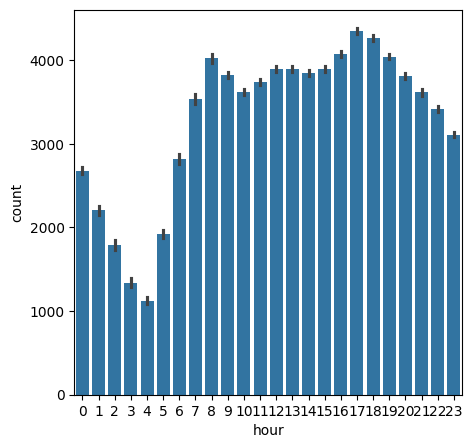

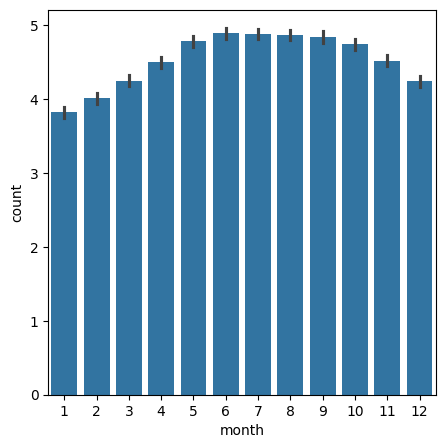

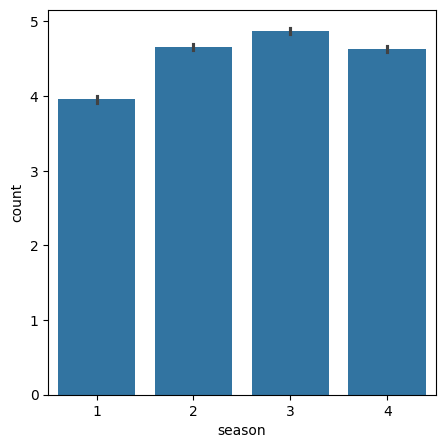

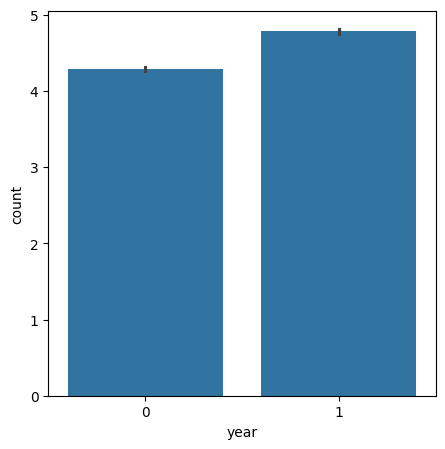

In [62]:
# groupby x and make a estimator for y-axis and without estimator the default is mean
# plot bars of count for hour
plt.figure(figsize=(5,5))
sns.barplot(data=bike_dataset,x='hour',y='count',estimator=sum)
plt.show()
# plot bars of count for month
plt.figure(figsize=(5,5))
sns.barplot(data=bike_dataset,x='month',y='count')
plt.show()
# plot bars of count for season
plt.figure(figsize=(5,5))
sns.barplot(data=bike_dataset,x='season',y='count')
plt.show()
# plot bars of count for year
plt.figure(figsize=(5,5))
sns.barplot(data=bike_dataset,x='year',y='count')
plt.show()

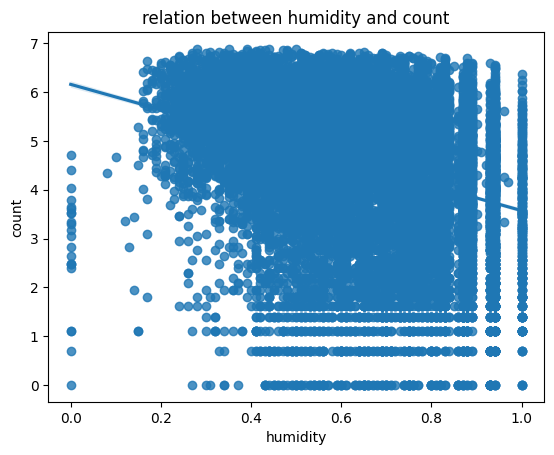

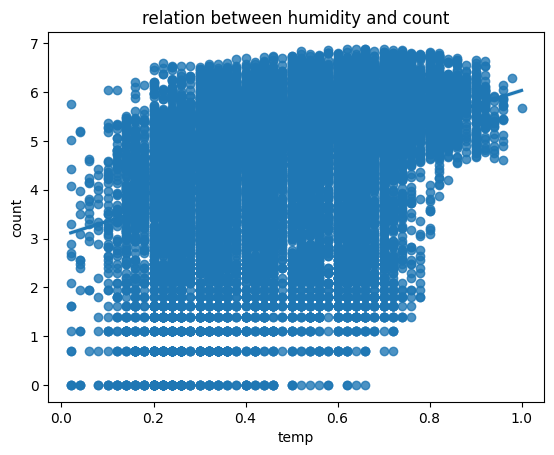

In [63]:
sns.regplot(x=bike_dataset['humidity'],y=bike_dataset['count'])
plt.title('relation between humidity and count')
plt.show()
sns.regplot(x=bike_dataset['temp'],y=bike_dataset['count'])
plt.title('relation between humidity and count')
plt.show()

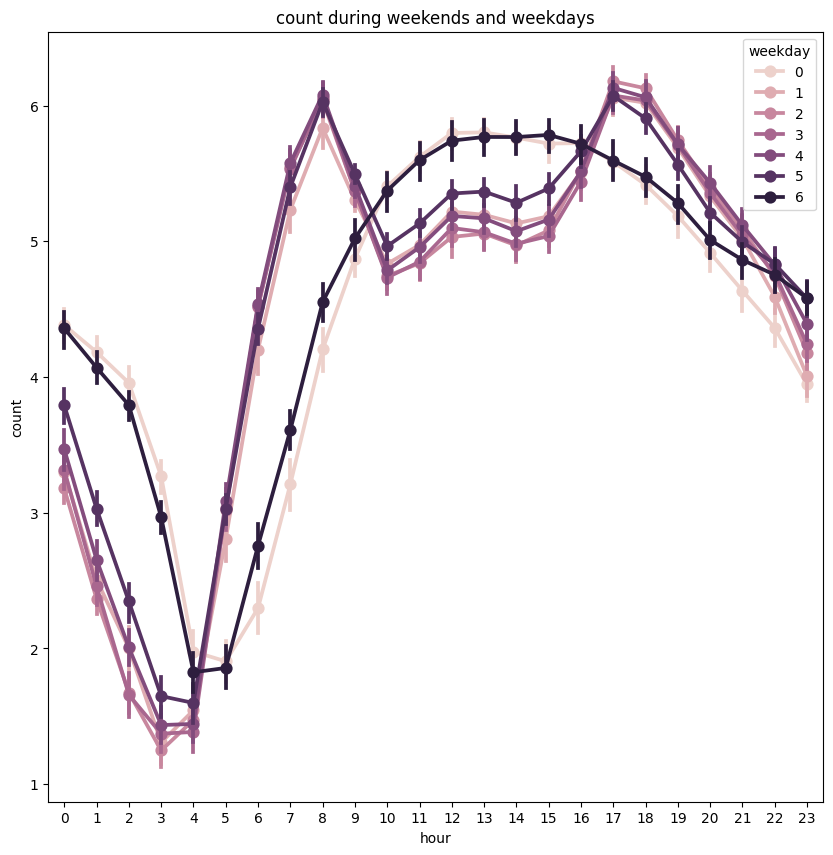

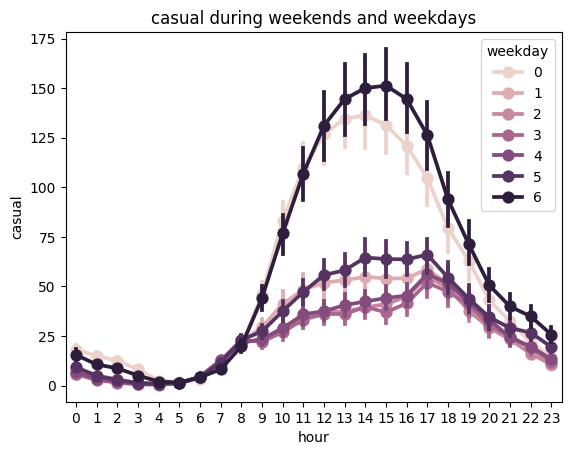

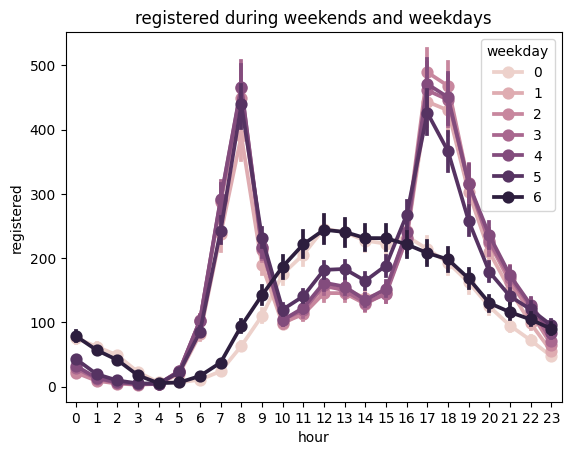

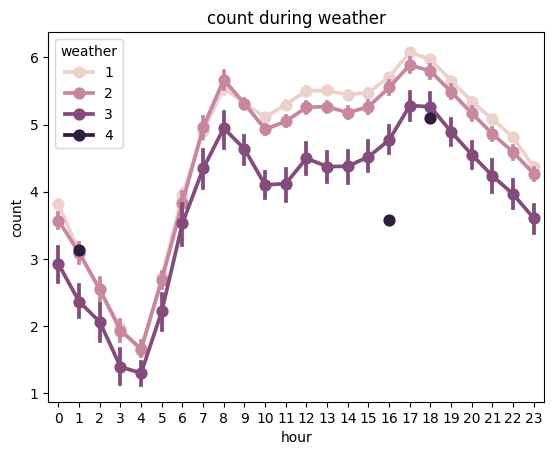

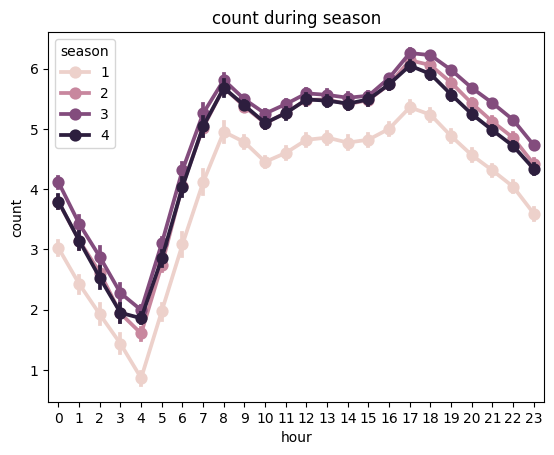

In [64]:
# plot count during weekends and weekdays
plt.figure(figsize=(10,10))
sns.pointplot(data=bike_dataset, x='hour', y='count', hue='weekday')
plt.title('count during weekends and weekdays')
plt.show()
# plot casual during weekends and weekdays
sns.pointplot(data=bike_dataset, x='hour', y='casual', hue='weekday')
plt.title('casual during weekends and weekdays')
plt.show()
# plot registered during weekends and weekdays
sns.pointplot(data=bike_dataset, x='hour', y='registered', hue='weekday')
plt.title('registered during weekends and weekdays')
plt.show()
# plot count during weather
sns.pointplot(data=bike_dataset, x='hour', y='count', hue='weather')
plt.title('count during weather')
plt.show()
# plot count during season
sns.pointplot(data=bike_dataset, x='hour', y='count', hue='season')
plt.title('count during season')
plt.show()

In [65]:
bike_dataset = bike_dataset.drop(columns=['instant','dteday','year'],axis=1)

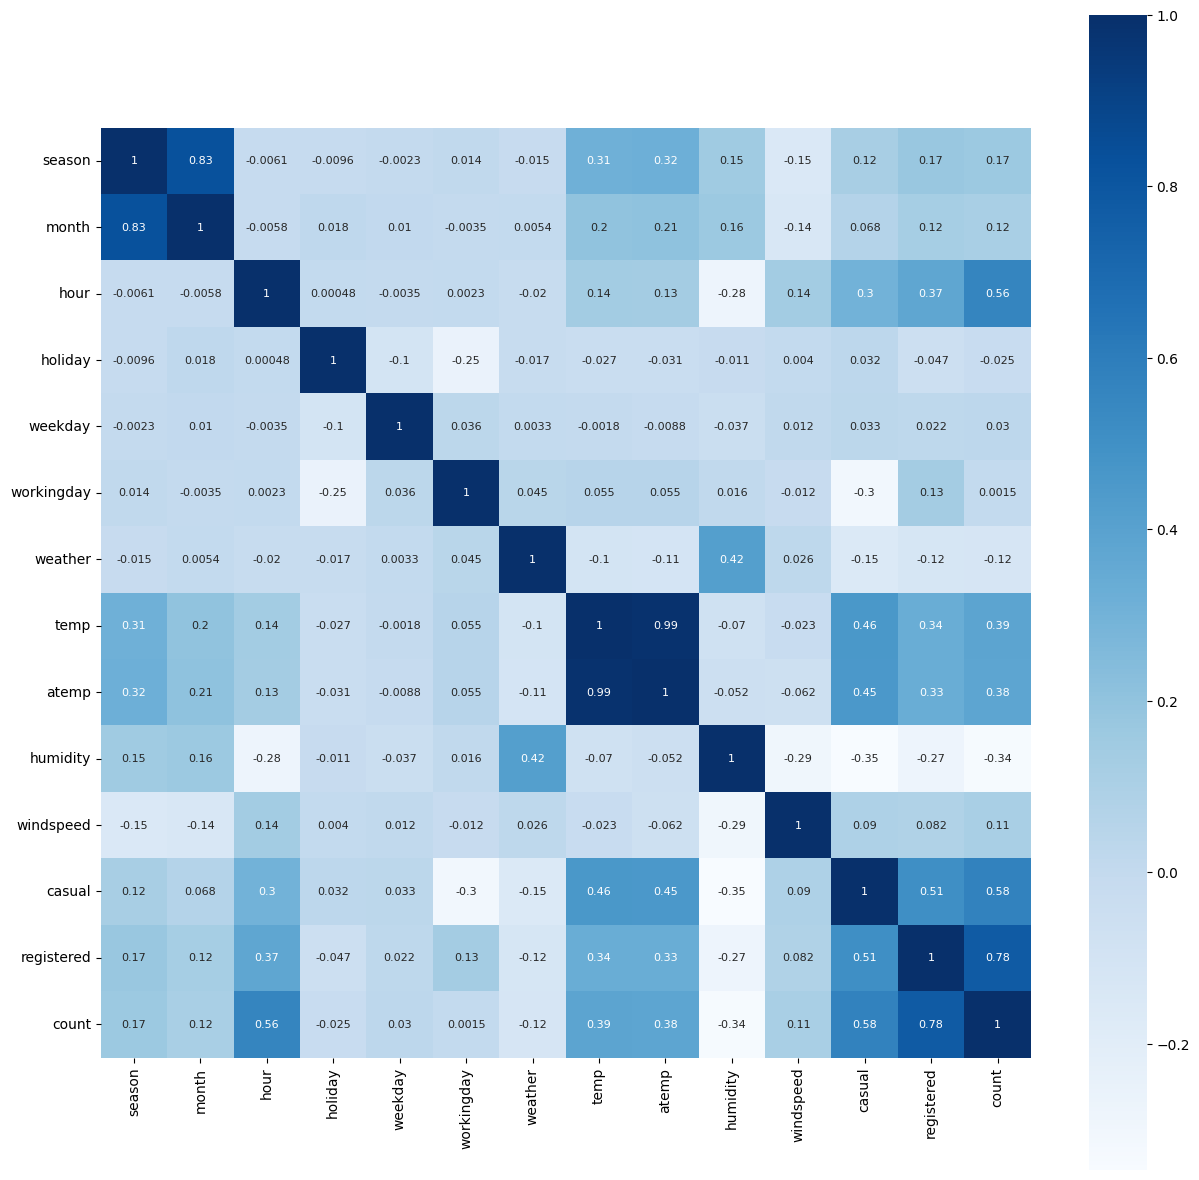

In [66]:
# Find correlation between all dataset features
correlation_values = bike_dataset.corr()
# plot correlation
plt.figure(figsize=(15,15))
sns.heatmap(correlation_values,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

In [67]:
cols = ['season','month','hour','holiday','weekday','workingday','weather']
for col in cols:
    bike_dataset[col] = bike_dataset[col].astype('category')

In [68]:
bike_dataset.head()
bike_dataset_oh = bike_dataset
bike_dataset_oh.head()

def one_hot_encoder(data,column):
    data = pd.concat([data,pd.get_dummies(bike_dataset[column],prefix=column,drop_first=True)],axis=1)
    data = data.drop(columns = [column],axis=1)
    return data
for col in cols:
    bike_dataset_oh = one_hot_encoder(bike_dataset_oh,col)

In [69]:
bike_dataset_oh.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,2.772589,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,0.22,0.2727,0.80,0.0,8,32,3.688879,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,0.22,0.2727,0.80,0.0,5,27,3.465736,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,0.24,0.2879,0.75,0.0,3,10,2.564949,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,0.24,0.2879,0.75,0.0,0,1,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [70]:
# Split data into input and label data
X = bike_dataset_oh.drop(columns=['atemp','windspeed','casual','registered','count'],axis=1)
Y = bike_dataset_oh['count']

In [71]:
# Split data into train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7)
print(X.shape,x_train.shape,x_test.shape)
print(Y.shape,y_train.shape,y_test.shape)

(17379, 50) (12165, 50) (5214, 50)
(17379,) (12165,) (5214,)


In [72]:
def plot_train_test(y_train,predicted_y_train,y_test,predicted_y_test):
    plt.figure(figsize=(7,7))
    plt.scatter(y_train,predicted_y_train,color='red',marker='X')
    plt.plot(range(int(min(y_train)),int(max(y_train))),color='black')
    plt.title('show actual and predicted train values')
    plt.xlabel('actual values')
    plt.ylabel('predicted values')
    plt.show()
    plt.scatter(y_test,predicted_y_test,color='blue',marker='o')
    plt.plot(range(int(min(y_test)),int(max(y_test))),color='black')
    plt.title('show actual and predicted test values')
    plt.xlabel('actual values')
    plt.ylabel('predicted values')
    plt.show()

In [73]:
# Train model and test it
def Train_predict(model,x_train,x_test,y_train,y_test):
    # Train model
    model.fit(x_train,y_train)
    # Make the model predict on train and test input data
    predicted_train_data = model.predict(x_train)
    predicted_test_data = model.predict(x_test)
    # plot difference between predicted and actual values
    plot_train_test(y_train,predicted_train_data,y_test,predicted_test_data)
    # Evaluate model
    accuracy_train_pred = r2_score(y_train,predicted_train_data)
    accuracy_test_pred = r2_score(y_test,predicted_test_data)
    # Return accuracy
    return [accuracy_train_pred,accuracy_test_pred]

In [74]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

the model: LinearRegression() :


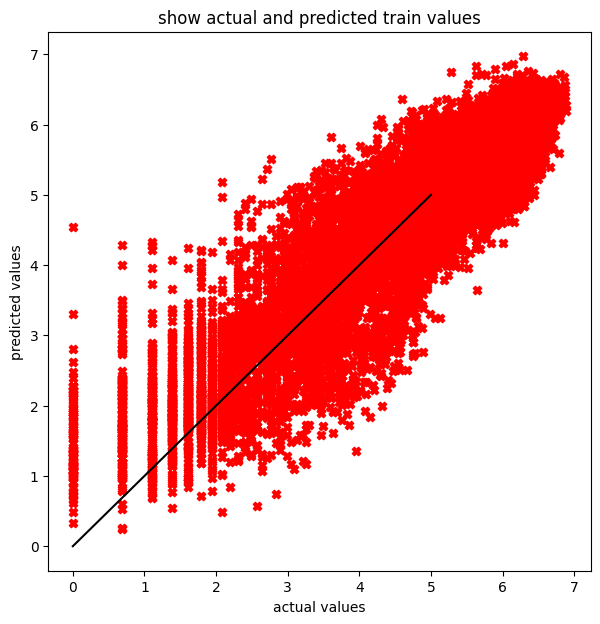

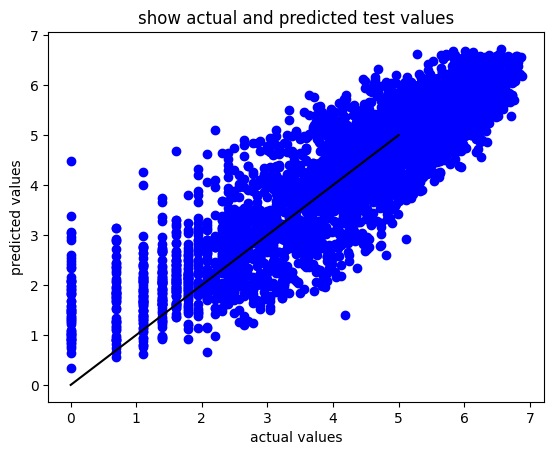

and has 0.8015008832073676 on train data and 0.7899404172298053 on test data



the model: DecisionTreeRegressor() :


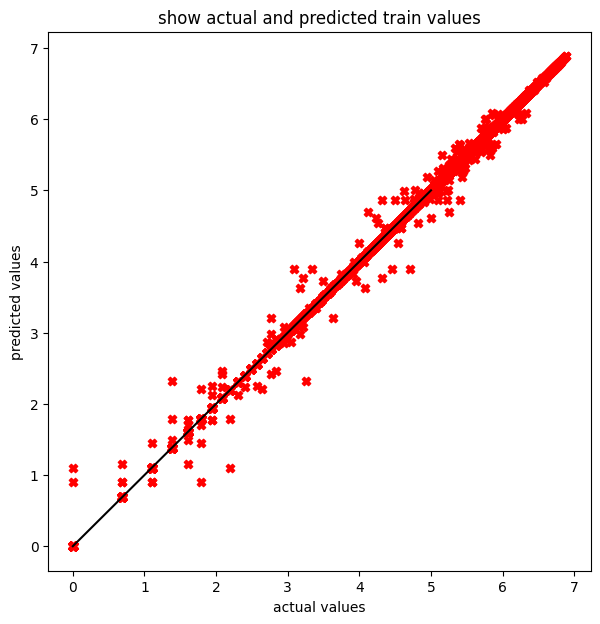

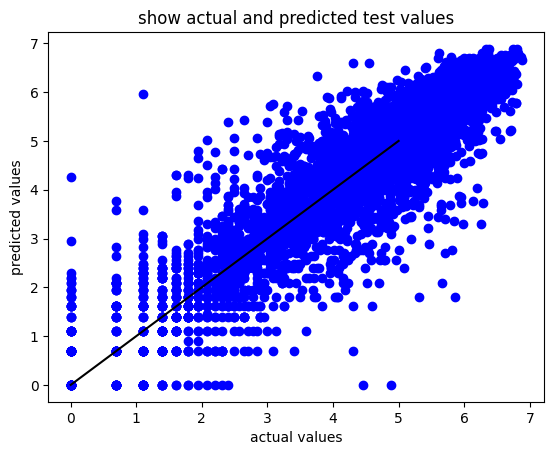

and has 0.9993937818844563 on train data and 0.7855870541690709 on test data



the model: RandomForestRegressor() :


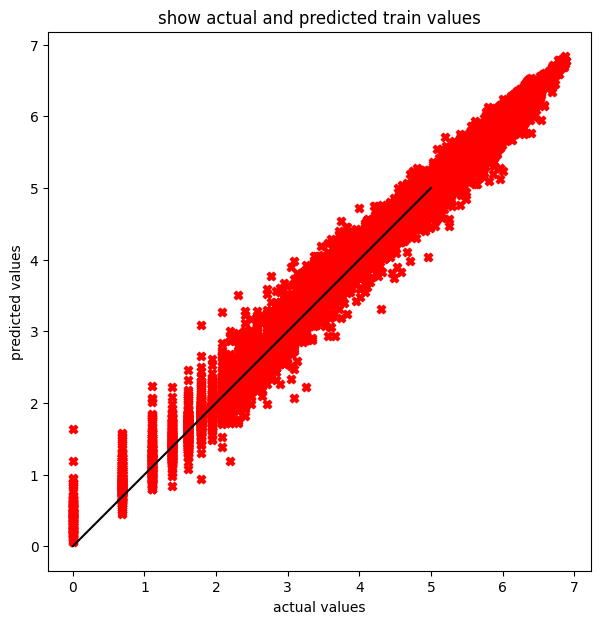

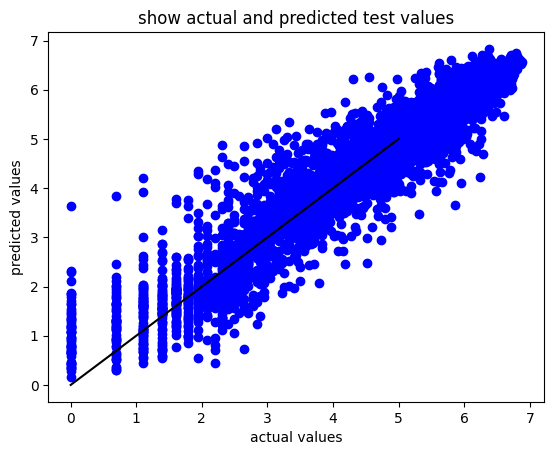

and has 0.9847444922026549 on train data and 0.8878624757892748 on test data



the model: Ridge() :


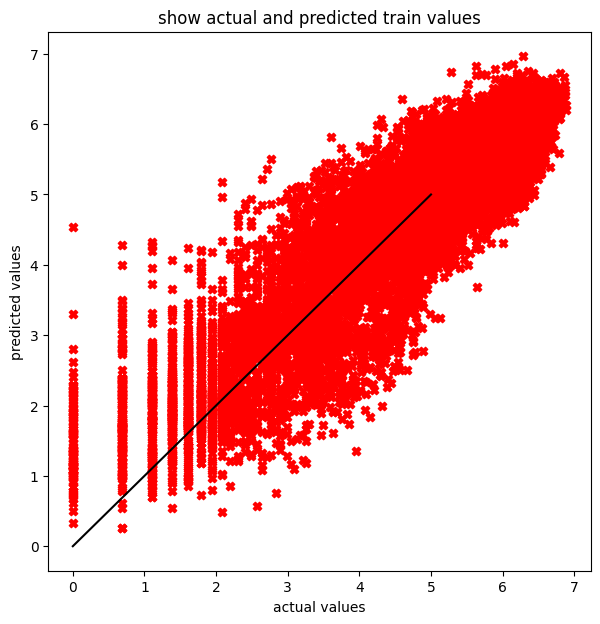

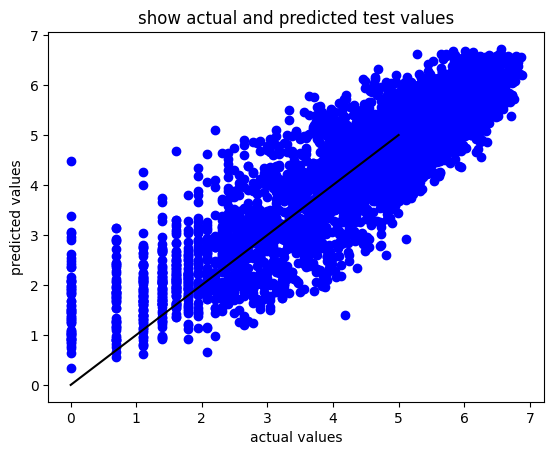

and has 0.8014736581966193 on train data and 0.7899388803336007 on test data



the model: HuberRegressor() :


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


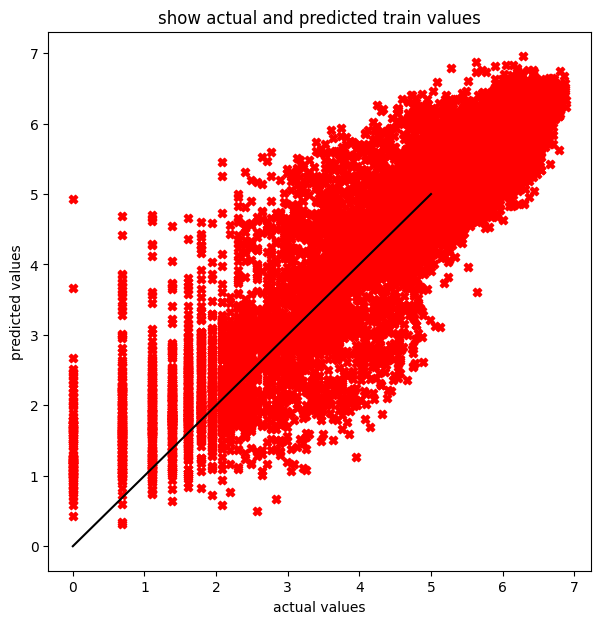

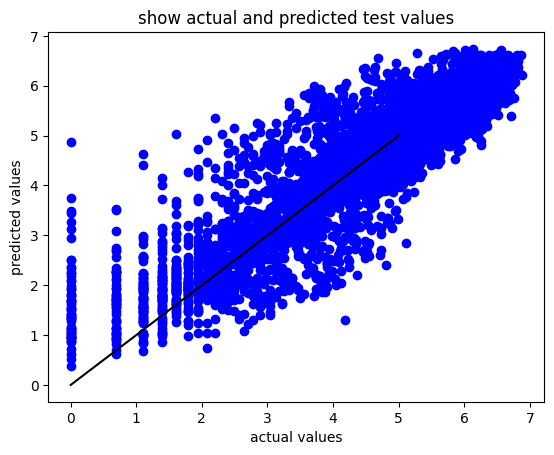

and has 0.793860652920005 on train data and 0.7863742586499063 on test data



the model: ElasticNetCV() :


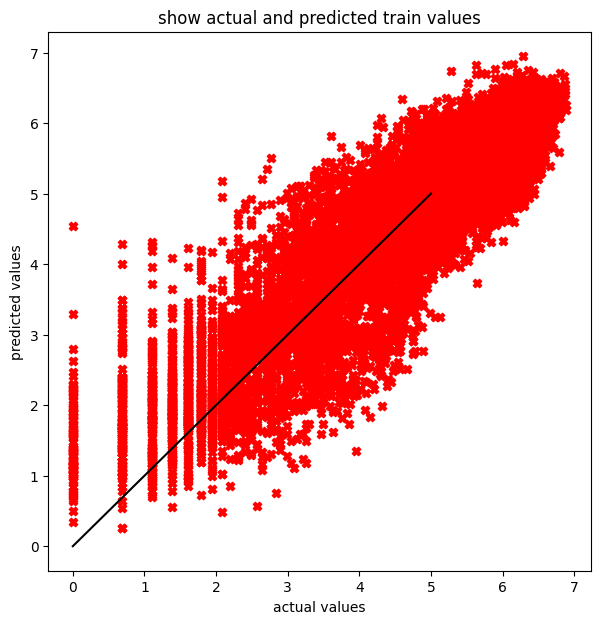

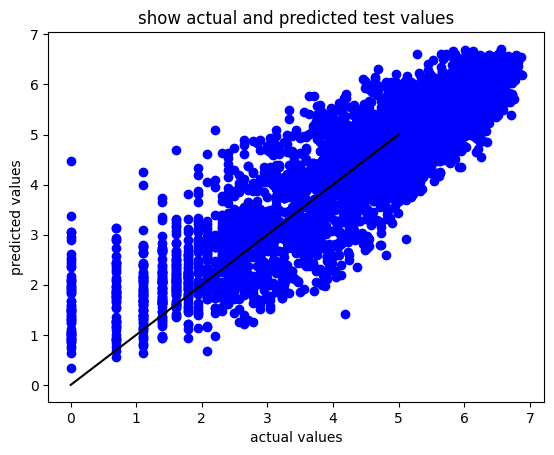

and has 0.8013316974573489 on train data and 0.7898149882018912 on test data



the model: GradientBoostingRegressor() :


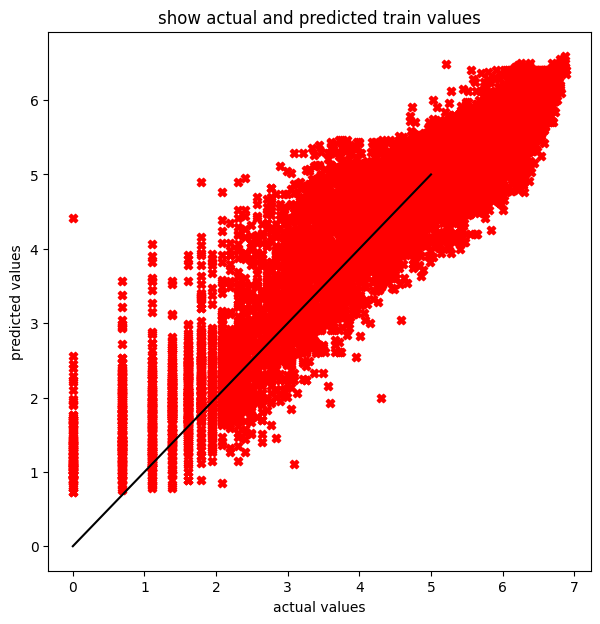

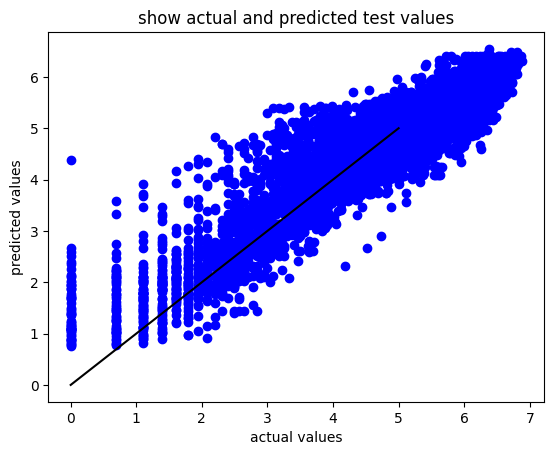

and has 0.849785508988262 on train data and 0.8324009533646881 on test data



the model: ExtraTreesRegressor() :


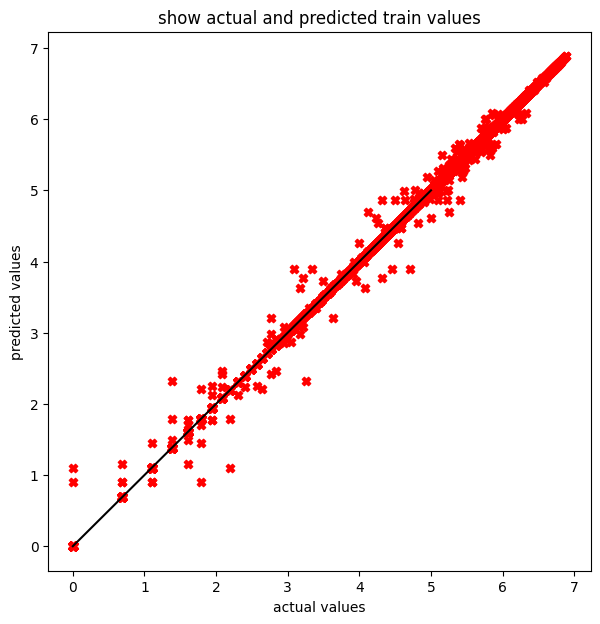

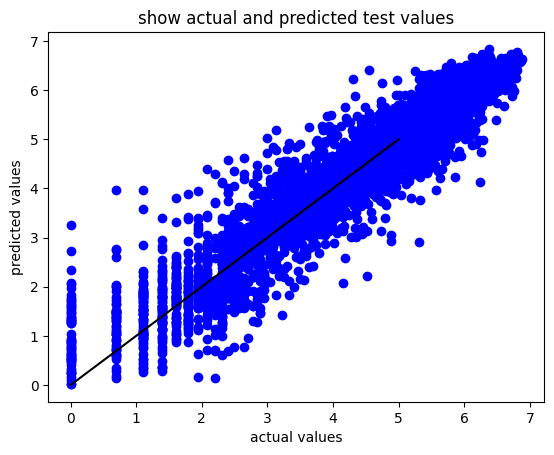

and has 0.9993937818844563 on train data and 0.8908487520209241 on test data





In [75]:
Models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    Ridge(),
    HuberRegressor(),
    ElasticNetCV(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor()
]
for model in Models:
    print("the model:",model,":")
    accuracy_train_pred, accuracy_test_pred = Train_predict(model,x_train,x_test,y_train,y_test)
    print("and has",accuracy_train_pred,"on train data and",accuracy_test_pred,"on test data\n\n\n")

**Insight**

- The count of bikeshare rides usage are largely affected by weather conditions. There are significantly less rides during heavy rain and thunderstorms compared to nicer weathers.

- This conditons hold true for all seasons.

**Conclusion**

- The number of bikeshare rides in 2012 was higher than in 2011. Both years showed the same trend and seasonality, with the number of rides increasing in the middle of the year and decreasing at the beginning and end of the year.

- What is the usage pattern of bike-sharing rides based on time of day?
For registered users, the number of rides peaked at 8:00 AM and 5:00 PM, suggesting that they may have used the bikes to commute to work.
For casual users, the number of rides started to increase during the day and decreased during the night.

- What season has the highest bike-sharing rides?
Bikeshare rides were highest during the summer season and lowest during the winter season.

- What is the usage pattern of bike-sharing rides based on day of the week?
For registered users, the number of rides was higher during weekdays. This is consistent with the findings in question 2, suggesting that registered users likely used the bikes to commute to work.
For casual users, the number of rides was higher on weekends than on weekdays, indicating that they used the bikes for leisure activities on weekends.

- Are there any correlations between temperatures that indicate conditions when bike-sharing rides are high?
Yes, there is a moderate correlation between temperature and the number of bikeshare rides.
The number of rides is lowest at colder temperatures, which occur during the winter, and starts to increase as the temperature increases, which happens in the summer. However, there is a "sweet spot" or temperature range when the number of rides is highest, which is between 20°C and 30°C. This temperature range typically occurs during the summer and fall seasons.
On days with these temperature conditions, we can expect the number of bikeshare rides to be high.

- Does weather affect bikeshare usage?
Yes, the number of rides is significantly higher during clear weather than during more extreme weather conditions.